# Computational astrophy test site:

co owned by Sara Kok, Maria Georganti and Athul Muralidhar Jan, 2018

This source code is written in Python-3
All values in AU, Solar system units

# Initial imports:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 
from time import time
from matplotlib import animation

# Stage-1: Sun-Jupiter one body system (r,$\theta$) | astroids: 0


<IPython.core.display.Javascript object>


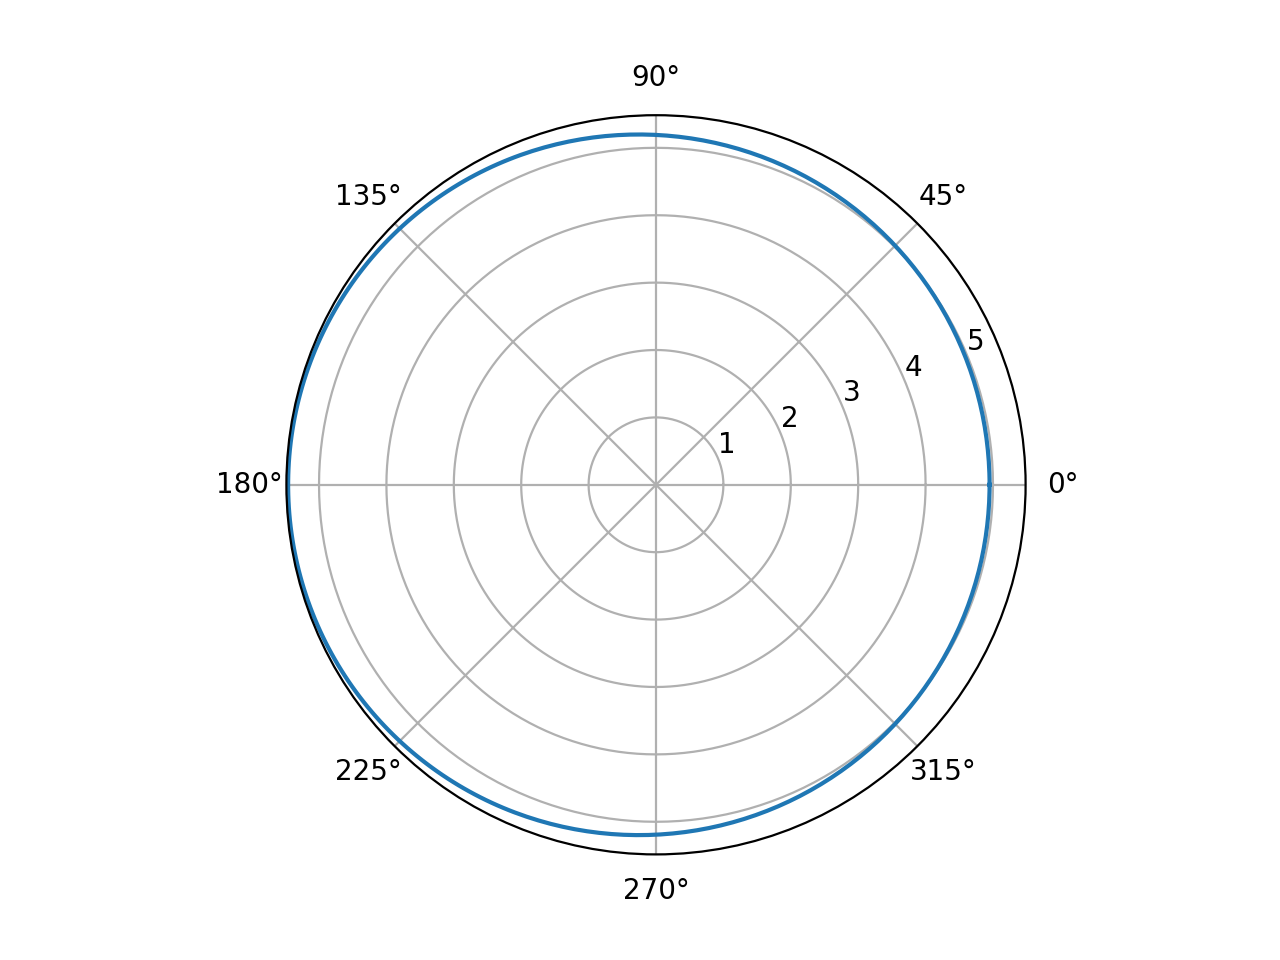

'\nreferences:\nhttps://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html\nhttps://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion\n'

In [5]:

cos = np.cos
pi = np.pi

a = 5.204 # semimajor axis - Jupiter
e = 0.0489 # orbital eccentricity-Jupiter
theta = np.linspace(0, 2*pi, 360) # degrees
r = (a*(1-e**2))/(1+e*cos(theta)) # Kepler's law for orbits
 
plt.polar(theta, r)
plt.show()

"""
references:
https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion
"""


<IPython.core.display.Javascript object>


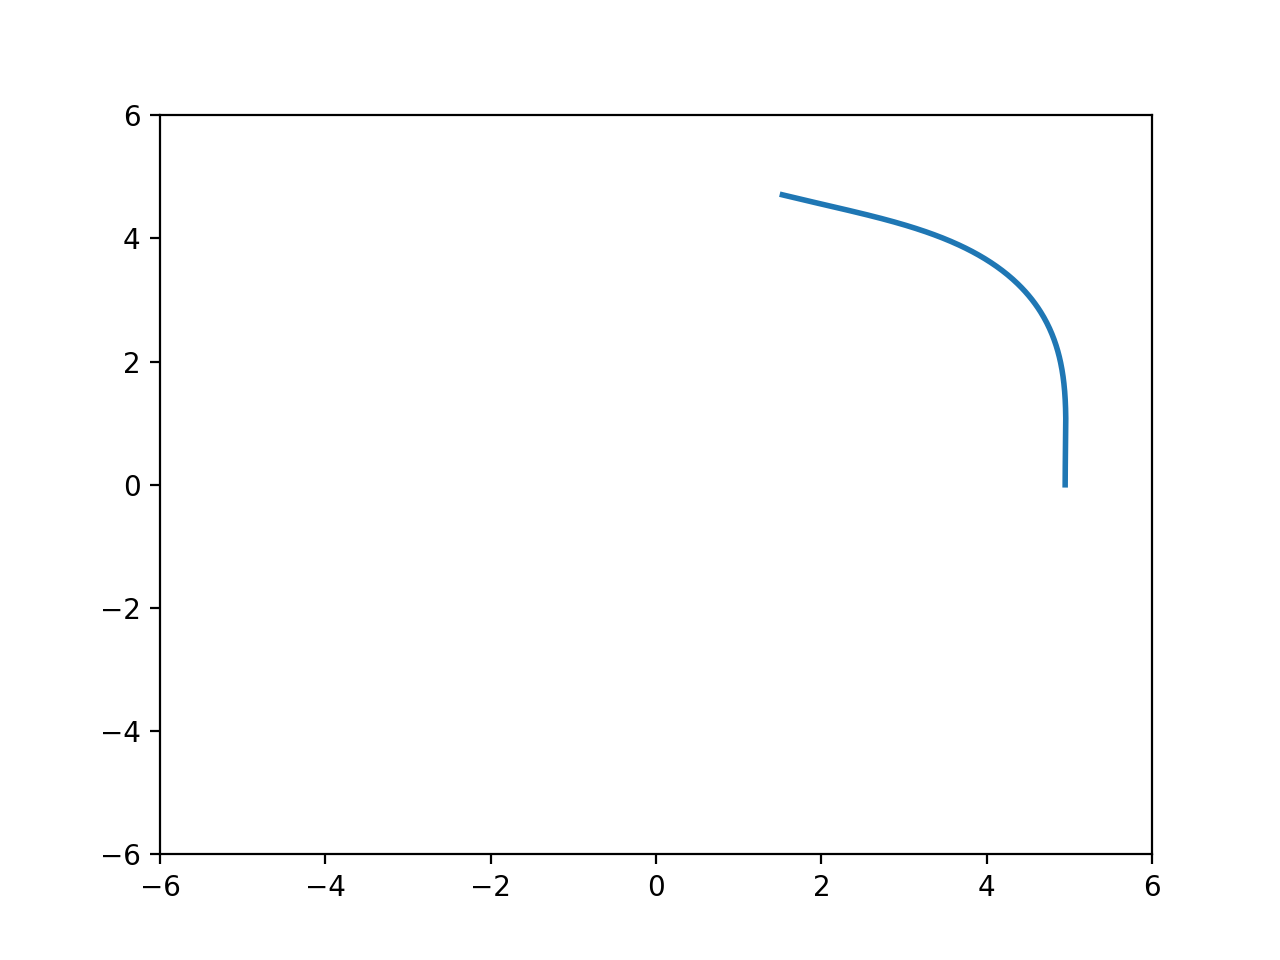

('time taken:', 0.15111613273620605)


In [7]:

s = time()
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!

 ref : https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation


cos = np.cos
sin = np.sin
pi = np.pi

a = 5.204 # semimajor axis - Jupiter
e = 0.0489 # orbital eccentricity-Jupiter
theta = np.linspace(0, 2*pi, 360) # degrees
r = (a*(1-e**2))/(1+e*cos(theta)) # Kepler's law for orbits


# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-6, 6), ylim=(-6, 6))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = r*cos(theta*0.1*i)
    y = r*sin(theta*0.1*i)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

e = time()
print('time taken:',e-s)


# Stage-1.1: Sun, jupiter 1 body system (x,y) | astroids = 0
ref: Selma's ppt week: 3.2 using Euler forward

<IPython.core.display.Javascript object>


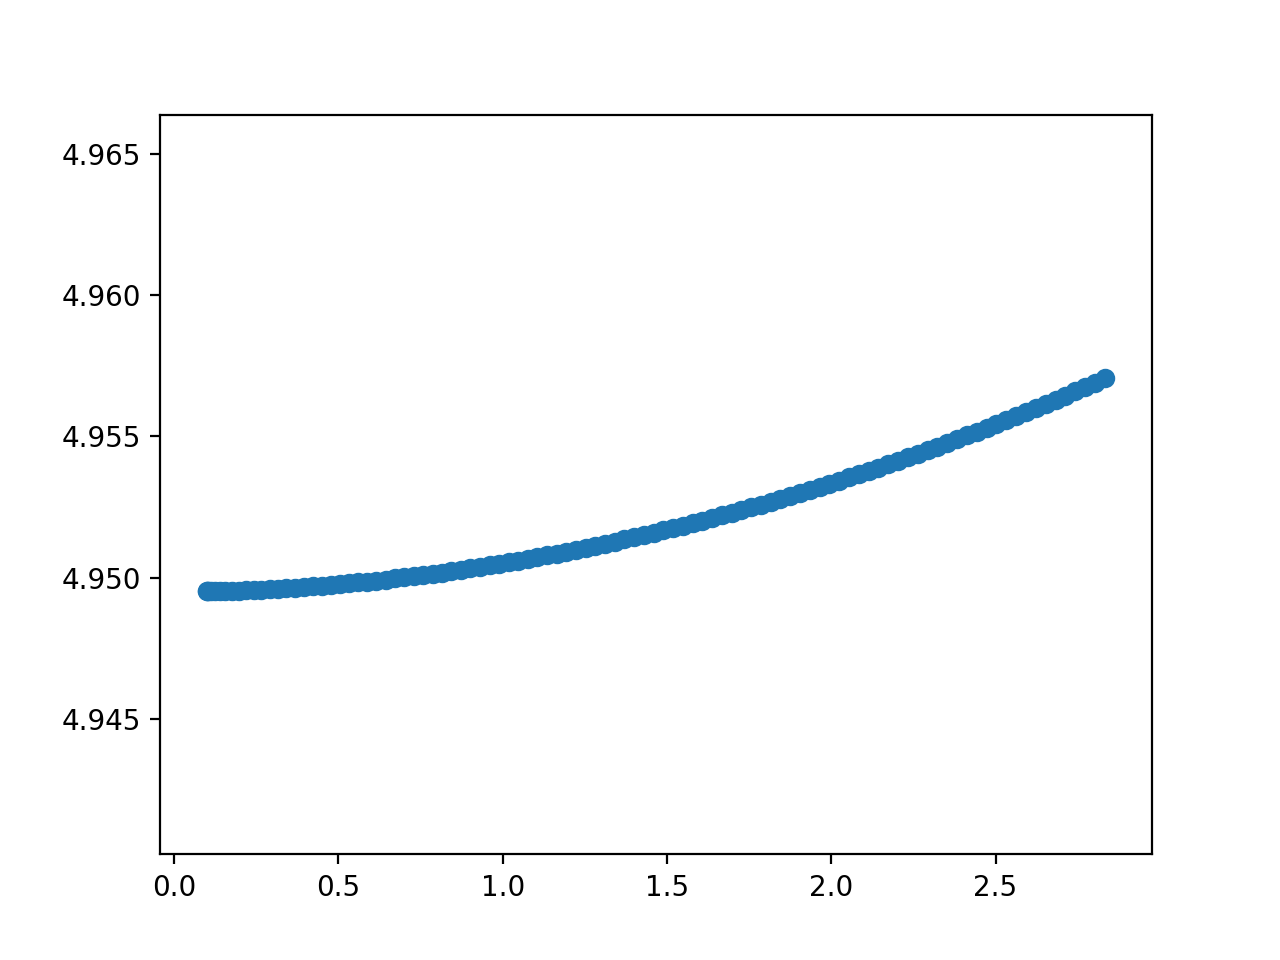

('time taken:', 0.1019899845123291)


In [29]:
s = time()

# initializing
x = list(np.zeros(100))
y = list(np.zeros(100))
u = list(np.zeros(100)) # ref to velocity in y
v = list(np.zeros(100)) # ref to velocity in x
a = 5.204 # semimajor axis - Jupiter
e = 0.0489 # orbital eccentricity-Jupiter

# initial conditions:
x[0] = 0.1
y[0] = a*(1-e)
v[0] = 0.1
u[0] = -((4*np.pi**2*(1+e))/(a*(1-e)))**0.5
h = 0.000001
# print(u)

# solving

for i in range(99):
    x[i+1]  = x[i] + h*v[i]
    v[i+1]  = v[i] + (4*np.pi**2)/(x[i]**2)
    y[i+1]  = y[i] + h*u[i]
    u[i+1]  = u[i] + (4*np.pi**2)/(y[i]**2)
    

# print(x)
# print(y)
# print(v)
# print(u)

plt.scatter(x,y)
plt.show()

e = time()
print("time taken:",e-s)

In [1]:
#!/usr/bin/env python

import numpy as np
import timeit as ti
import scipy.stats as st
import scipy.integrate as ig
import matplotlib.pyplot as pl
import matplotlib.ticker as tk


def euler_forward(previous=np.array([[1.0], [0.0]]), step=1e-3):
    '''
    Using the Euler Forward Method written in the matrix form for this specific
    system of differential equations, this function receives the last step - as
    well as a step size value - and returns the following step.
    '''

    assert step > 0.0, 'Step has to be higher than zero!'

    matrix = np.array([[1.0, step], [-step, 1.0]])

    return np.dot(matrix, previous)


def euler_backward(previous=np.array([[1.0], [0.0]]), step=1e-3):
    '''
    Using the Euler Backward Method written in the matrix form for this
    specific system of differential equations, this function receives the
    last step - as well as a step size value - and returns the following step.
    '''

    assert step > 0.0, 'Step has to be higher than zero!'

    matrix = (1.0/(1.0+step**2))*np.array([[1.0, step], [-step, 1.0]])

    return np.dot(matrix, previous)


def euler_symplectic(previous=np.array([[1.0], [0.0]]), step=1e-3):
    '''
    Using the Euler Symplectic Method written in the matrix form for this
    specific system of differential equations, this function receives the
    last step - as well as a step size value - and returns the following step.
    '''

    assert step > 0.0, 'Step has to be higher than zero!'

    matrix = np.array([[1.0-step**2, step], [-step, 1.0]])

    return np.dot(matrix, previous)


def func(previous=np.array([[1.0], [0.0]])):
    '''
    Returns the vectorial function f(x, v) associated to the specific problem
    (Harmonic Oscillator), given the previous known point.
    '''
    return np.array([[previous[1][0]], [-previous[0][0]]])


def midpoint_rule(previous=np.array([[1.0], [0.0]]), step=1e-3):
    '''
    Using the Midpoint Rule, this function receives the last step - as well as
    a step size value - and returns the following step.
    '''

    assert step > 0.0, 'Step has to be higher than zero!'

    k1 = step*func(previous)
    k2 = step*func(previous+0.5*k1)

    return previous+k2


def runge_kutta(previous=np.array([[1.0], [0.0]]), step=1e-3):
    '''
    Using the fourth order Runge-Kutta, this function receives the last step -
    as well as a step size value - and returns the following step.
    '''

    assert step > 0.0, 'Step has to be higher than zero!'

    k1 = step*func(previous)
    k2 = step*func(previous+0.5*k1)
    k3 = step*func(previous+0.5*k2)
    k4 = step*func(previous+k3)

    return previous+k1/6.0+k2/3.0+k3/3.0+k4/6.0


def f_ode(previous, t):
    '''
    Same as func, but this one is specifically for the odeint integrator.
    '''
    return [previous[1], -previous[0]]


def calc(solution=np.array([[1.0], [0.0]]), method=euler_forward,
         step=1e-3, num_step=5e4):
    '''
    This function receives the initial condition, a specific solving method,
    the step size and the total number of steps and uses all these to compute
    the solution of a certain system of differential equantions.
    '''

    assert step > 0.0, 'Step has to be higher than zero!'
    assert int(num_step) >= 1, 'Number of steps has to be higher than one!'

    for i in range(int(num_step)):
        solution = np.append(solution, method(solution[:, [i]], step), axis=1)

    return solution


def plot(name='Plots/test_plot.png', title='Plotting test', data=[[[0.0, 1.0],
         [1.0, 0.8]], [[0.0, 1.0], [0.6, 0.0]]], params=[['k', '-', 1.1],
         ['r', '--', 0.9]], axes=['Time (t/s)', 'Position (x/m)'], legend=0,
         labels=['Data 1', 'Data 2'], scale='linear'):
    '''
    This function receives a group of parameters (such as the figure name, the
    figure title, the markers/lines parameters, the axes labels, the legend
    position within the figure, the data legends and the axes scale) and a set
    of data and plots them all together in the same figure.
    '''

    assert len(data) > 0, 'Data cannot be an empty array!'
    assert len(labels) == len(data), 'Incorrect amount of labels!'
    assert len(params) == len(data), 'Incorrect amount of marker parameters!'

    # Sets the size of the generated figure.
    pl.figure(figsize=(8, 4))

    # Sets the rotation of the tick labels.
    pl.xticks(rotation=15)
    pl.yticks(rotation=15)

    # Sets the title parameters.
    pl.title(title, fontsize=18, weight='bold')

    # Sets the axes labels parameters.
    pl.xlabel(axes[0], labelpad=8, fontsize=14)
    pl.ylabel(axes[1], labelpad=8, fontsize=14)

    # Sets the background grid parameters.
    pl.grid(color='gray', linestyle='-.', linewidth=0.8, alpha=0.2)

    # Sets the axes ticks parameters.
    ca = pl.gca()
    ca.tick_params(which='minor', bottom=False, left=False)
    ca.tick_params(top=True, right=True, length=5, width=1.25,
                   labelsize=10, direction='in', pad=5)
    if scale == 'log':
        ca.xaxis.set_major_formatter(tk.ScalarFormatter())
        ca.yaxis.set_major_formatter(tk.ScalarFormatter())
    if scale == 'linear':
        ca.ticklabel_format(axis='y', fontstyle='italic', style='sci',
                            useMathText=True, scilimits=(0, 0))

    # Sets the axes thickness.
    sides = ['top', 'bottom', 'left', 'right']
    [ca.spines[s].set_linewidth(1.25) for s in sides]

    # Plots the different sets of data with the received parameters.
    for i in range(len(data)):
        ca.plot(data[i][0], data[i][1], params[i][0]+params[i][1],
                label=labels[i], lw=float(params[i][2]))

    # Sets the legend parameters.
    ca.legend(loc=legend, ncol=3, columnspacing=0.65, handletextpad=0.15,
              labelspacing=0.15, handlelength=1.3, borderpad=0.25,
              borderaxespad=0.75)

    # Sets the axes offset text (scientific notation) parameters.
    xo, yo = ca.get_xaxis().get_offset_text(), ca.get_yaxis().get_offset_text()
    xo.set_fontsize(8)
    yo.set_fontsize(8)
    xo.set_fontstyle('italic')
    yo.set_fontstyle('italic')

    # Sets the axes scale.
    if scale != 'linear':
        pl.xscale(scale)
        pl.yscale(scale)

    # Saves and closes the obtained figure.
    pl.tight_layout()
    pl.savefig(name, dpi=500, facecolor='ivory', edgecolor=None)
    pl.close()


def results(method=euler_forward, method_name='Euler Forward',
            method_tag='feul', time_ana=np.arange(0.0, 10.0, 0.1),
            step=1e-3, solu_ana=np.cos(np.arange(0.0, 10.0, 0.1)),
            num_step=5e4, h_list=np.logspace(-5, 0, num=5, base=2)):
    '''
    This function receives, as a function, a computional method to solve a
    specific set of coupled first order differential equations (as well as the
    respective method name and tag for the filenames), an array with times and
    another one with the known analytic solution of the system on those points
    in time, the step size and the total number of steps used in the analytic
    solution array and the list of step sizes that will be used with the chosen
    method. Not only it creates some plots showing the difference between the
    calculated quantities considering the different step sizes, as it also
    returns those quantities for a further analysis outside this function.
    '''

    assert step > 0.0, 'Step has to be higher than zero!'
    assert len(h_list) > 0, 'List of step sizes cannot be an empty array!'
    assert int(num_step) >= 1, 'Number of steps has to be higher than one!'
    assert len(time_ana) > 0, 'Analytic times cannot be an empty array!'
    assert len(solu_ana) > 0, 'Analytic solution cannot be an empty array!'
    assert len(time_ana) == len(solu_ana), 'Unmatching analytic arrays!'

    # Creates empty arrays that will contain the calculated quantities (such as
    # the computed times, the computed solution, the computed total energy of
    # the considered system, the absolute global error in the computed position
    # when comparing to the analytic solution, the maximum absolute global
    # error for each considered step size and the maximum system energy value
    # for each considered step size as well).
    time_com, solu_com, solu_ene = [], [], []
    posi_err, maxi_err, maxi_ene = [], [], []

    # Stores the list of colors used for plotting the data corresponding to the
    # different considered step sizes.
    colors = ['g', 'y', 'c', 'b', 'm', 'r']

    # Creates and initializes the arrays that will contain all the data labels,
    # the markers/lines parameters for plotting purposes and, for every step
    # size considered, the computed system solutions, the absolute global
    # errors and the total energy of the system - all as functions of the time.
    data_labels, data_params = ['Ana. Sol.'], [['k', '-', 1.1]]
    solutions, global_errors, energies = [[time_ana, solu_ana]], [], []

    for i in range(len(h_list)):
        # Calculates the amount of steps needed to get to a specific time.
        h = h_list[i]
        N = num_step*step/h

        # Calculates the time array, the computed system solution, the absolute
        # global errors in the computed solution for the mass position and its
        # corresponding maximum value, the initial energy of the system, the
        # energy of the system relatively to its initial value and, finally,
        # the maximum of the previously mentioned array. The if/else exception
        # deals with the odeint integration differently.
        time_com.append(np.arange(0.0, num_step*step, h))
        leng = len(time_com[i])
        if method != ig.odeint:    
            solu_com.append(calc(step=h, method=method, num_step=N)[:, :leng])
        else:
            temp = method(f_ode, [1.0, 0.0], time_com[i], hmin=h, hmax=h)
            solu_com.append(np.swapaxes(temp, 0, 1))
        iene = solu_com[i][0][0]**2 + solu_com[i][1][0]**2
        solu_ene.append(np.sum(solu_com[i]**2, axis=0)-iene)
        posi_err.append(np.cos(time_com[i])-solu_com[i][0])
        maxi_ene.append(max(np.absolute(solu_ene[i])))
        maxi_err.append(max(np.absolute(posi_err[i])))

        # Adds the new data labels and respective markers/lines parameters, and
        # stores the some of the previous calculations in the previously
        # created arrays for this specific purpose.
        data_labels.append('h = %.3f' % h)
        data_params.append([colors[i], '--', 0.9])
        solutions.append([time_com[i], solu_com[i][0]])
        global_errors.append([time_com[i], posi_err[i]])
        energies.append([time_com[i], solu_ene[i]])

    # For different step sizes and the considered method, generates three
    # plots: the first one with the computed solutions as a function of time,
    # the second one with the computed absolute global errors as a function of
    # time (relatively to the known analytic solution) and the third one with
    # the total energy of the system as a function of time (relatively to its
    # initial value).
    plot(name='Plots/' + method_tag + '_sol.png', data=solutions,
         title=method_name + ' - Solution', labels=data_labels,
         params=data_params, legend=3)

    plot(name='Plots/' + method_tag + '_err.png', data=global_errors,
         title=method_name + ' - Error', labels=data_labels[1:],
         axes=['Time (t/s)', 'Absolute global error (x/m)'],
         params=data_params[1:])

    plot(name='Plots/' + method_tag + '_ene.png', data=energies,
         title=method_name + ' - Energy', labels=data_labels[1:],
         axes=['Time (t/s)', 'Total energy variation (E/J)'],
         params=data_params[1:])

    return [solutions, global_errors, energies, maxi_ene, maxi_err]


if __name__ == '__main__':
    # Tests the plotting function.
    plot()

    # Generates the analytical solution.
    step_size, number_steps = 1e-3, 5e4
    analytic_times = np.arange(0.0, number_steps*step_size, step_size)
    analytic_solution = np.cos(analytic_times)

    # Generates the array of step sizes that will be used.
    steps_list = 0.512*np.logspace(-9, -4, num=6, base=2, endpoint=True)

    # Stores the functions, names and tags (for the filenames) for each method.
    methods = [euler_forward, euler_backward, euler_symplectic,
               midpoint_rule, runge_kutta, ig.odeint]
    names = ['Euler Forward', 'Euler Backward', 'Euler Symplectic',
             'Midpoint Rule', '$4^{th}$ Runge-Kutta', 'SciPy odeint']
    tags = ['eul_for', 'eul_bac', 'eul_sym', 'mid_rul', 'run_kut', 'ode_int']
    assert len(names) == len(methods), 'Arrays must have the same length!'
    assert len(tags) == len(methods), 'Arrays must have the same length!'

    # Stores the list of colors used for plotting the data corresponding to the
    # different considered methods.
    colors = ['g', 'y', 'c', 'b', 'm', 'r']

    # Creates an array which will contain the final results of each considered
    # method and also empty arrays for some useful linear regressions - these
    # will give an idea of the rate of growth of the quantities (total energy
    # of the system and absolute global error) plotted in the y axis as a
    # function of the step size. Then it executes all the calculations for each
    # method, storing the obtained results directly into the mentioned arrays;
    # arrays for the labels and marker/lines parameters are also created.
    final, energy, errors, ene_label, err_label, pars = [], [], [], [], [], []
    for i in range(len(methods)):
        # Exception that deals with the fact that the odeint function does not
        # integrate for the three bigger step sizes that were chosen.
        if methods[i] == ig.odeint:
            slist = steps_list[:3]
        else:
            slist = steps_list
        final.append(results(method=methods[i], method_name=names[i],
                             method_tag=tags[i], time_ana=analytic_times,
                             solu_ana=analytic_solution, h_list=slist))

        energy.append([slist, final[i][3]])
        ene_label.append(names[i])
        l = st.linregress(np.log10(slist), np.log10(final[i][3]))
        temp = (10**l[1])*(slist**l[0])
        energy.append([slist, temp])
        ene_label.append(r'$\Delta E=a\times h^{%.3f}$' % l[0])

        errors.append([slist, final[i][4]])
        err_label.append(names[i])
        l = st.linregress(np.log10(slist), np.log10(final[i][4]))
        temp = (10**l[1])*(slist**l[0])
        errors.append([slist, temp])
        err_label.append(r'$GE=a\times h^{%.3f}$' % l[0])

        pars.append([colors[i], 'x', 7.5])
        pars.append([colors[i], ':', 1.1])

    # Generates two plots: the maximum value of the total energy of the system
    # as a function of the step size and the maximum absolute global error as a
    # function of the step size (for the different considered methods).
    plot(name='Plots/energy_method.png', title='Total energy vs. Step size',
         scale='log', axes=['Step size (h/m)', 'Maximum total energy (E/J)'],
         data=energy, labels=ene_label, params=pars)

    plot(name='Plots/errors_method.png', title='Global error vs. Step size',
         scale='log', axes=['Step size (h/m)', 'Maximum global error (x/m)'],
         data=errors, labels=err_label, params=pars)


FileNotFoundError: [Errno 2] No such file or directory: 'Plots/test_plot.png'

In [10]:
a = 5.204
e = 0.0489 


def eul_fwd_x(theta,previous=np.array([[1.0], [0.0]]), step=1e-3):
    '''
    Using the Euler Forward Method written in the matrix form for this specific
    system of differential equations, this function receives the last step - as
    well as a step size value - and returns the following step.
    '''

    assert step > 0.0, 'Step has to be higher than zero!'

    matrix = np.array([[1.0, step], [-step*4*np.pi**2/np.cos(theta), 1.0]])
    previous
    return np.dot(matrix, previous)

def eul_fwd_y(theta,previous=np.array([(a*(1-e))], [0.0]), step=1e-3):
    '''
    Using the Euler Forward Method written in the matrix form for this specific
    system of differential equations, this function receives the last step - as
    well as a step size value - and returns the following step.
    '''

    assert step > 0.0, 'Step has to be higher than zero!'

    matrix = np.array([[a*(1-e), step], [-step*4*np.pi**2/np.sin(theta), 1.0]])

    return np.dot(matrix, previous)


def func(previous=np.array([[1.0], [0.0]])):
    '''
    Returns the vectorial function f(x, v) associated to the specific problem
    (Harmonic Oscillator), given the previous known point.
    '''
    return np.array([[previous[1][0]], [-previous[0][0]]])

theta = np.linspace(0.1,2*np.pi)
x = [eul_fwd_x(i) for i in theta]
print(x)

[array([[ 1.        ],
       [-0.03967664]]), array([[ 1.        ],
       [-0.04051028]]), array([[ 1.        ],
       [-0.04206295]]), array([[ 1.        ],
       [-0.04447481]]), array([[ 1.        ],
       [-0.04798965]]), array([[ 1.        ],
       [-0.05302326]]), array([[ 1.        ],
       [-0.06030795]]), array([[ 1.        ],
       [-0.07122613]]), array([[ 1.        ],
       [-0.08869369]]), array([[ 1.        ],
       [-0.12004177]]), array([[ 1.        ],
       [-0.19034436]]), array([[ 1.       ],
       [-0.4777158]]), array([[ 1.        ],
       [ 0.90881459]]), array([[ 1.        ],
       [ 0.23383794]]), array([[ 1.        ],
       [ 0.13541709]]), array([[ 1.        ],
       [ 0.09638287]]), array([[ 1.        ],
       [ 0.07575187]]), array([[ 1.        ],
       [ 0.06322401]]), array([[ 1.        ],
       [ 0.05500236]]), array([[ 1.        ],
       [ 0.04936765]]), array([[ 1.        ],
       [ 0.04543553]]), array([[ 1.       ],
       [ 0.042